## M9-L1 Problem 2

Recall the von Mises stress prediction problem from the module 6 homework. In this problem, you will compute the $R^2$ score for a few model predictions for a single shape in this dataset. You will also plot the predicted-vs-actual stress for each model.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

float32 = np.float32

In [8]:
xs= np.load("data/L1P2/xs.npy")
ys= np.load("data/L1P2/ys.npy")
gt = np.load("data/L1P2/gt.npy")
model1= np.load("data/L1P2/model1.npy")
model2= np.load("data/L1P2/model2.npy")
model3= np.load("data/L1P2/model3.npy")

## Visualizing data

Run the following cell to load the data and visualize the 3 model predictions.

- `gt` is the ground truth von Mises stress vector
- `model1` is the vector of stress predictions for model 1
- `model2` is the vector of stress predictions for model 2
- `model3` is the vector of stress predictions for model 3

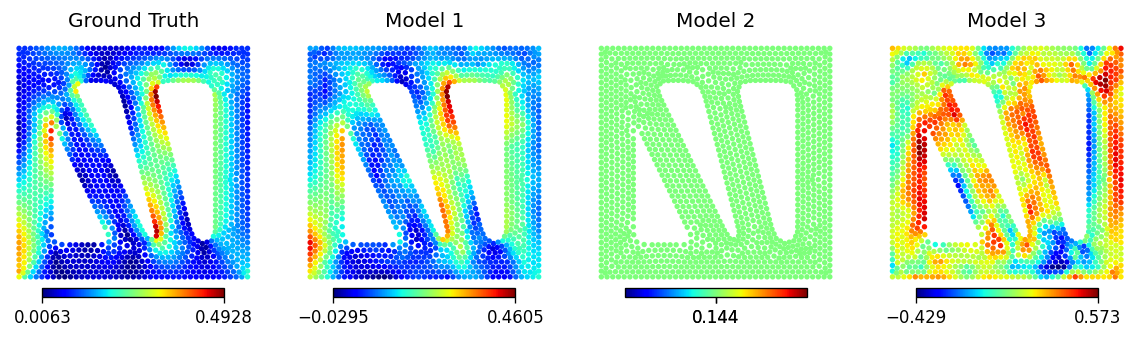

In [9]:
def plot_shape(x, y, stress, lims=None):

    if lims is None:
        lims = [min(stress),max(stress)]    

    plt.scatter(x,y,s=5,c=stress,cmap="jet",vmin=lims[0],vmax=lims[1])
    plt.colorbar(orientation="horizontal", shrink=.75, pad=0,ticks=lims)
    plt.axis("off")
    plt.axis("equal")

def plot_all(x, y, gt, model1, model2, model3):
    plt.figure(figsize=[12,3.2], dpi=120)
    plt.subplot(141)
    plot_shape(x, y, gt)
    plt.title("Ground Truth")

    plt.subplot(142)
    plot_shape(x, y, model1)
    plt.title("Model 1")

    plt.subplot(143)
    plot_shape(x, y, model2)
    plt.title("Model 2")

    plt.subplot(144)
    plot_shape(x, y, model3)
    plt.title("Model 3")

    plt.show()

plot_all(xs, ys, gt, model1, model2, model3)

## Computing $R^2$

Calculate the $R^2$ value for each model and print the results.


In [10]:
# YOUR CODE GOES HERE
def R2(y_gt, y_pred):
    num = np.sum((y_gt - y_pred) ** 2)
    den = np.sum((y_gt - np.mean(y_gt)) ** 2)

    return 1 - (num/den)

r2_m1_ = R2(gt, model1)
r2_m2_ = R2(gt, model2)
r2_m3_ = R2(gt, model3)

## Plotting predictions vs ground truth

Complete the function definition below for `plot_r2(gt, pred, title)`

Then create plots for all 3 models.

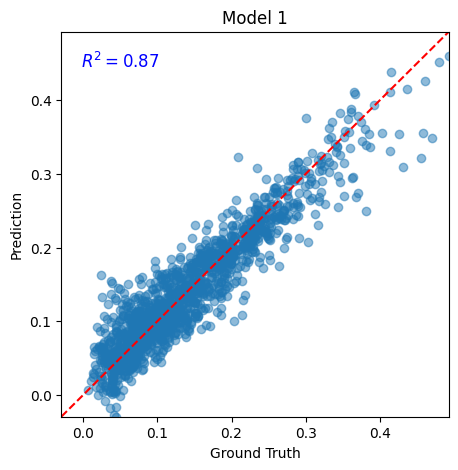

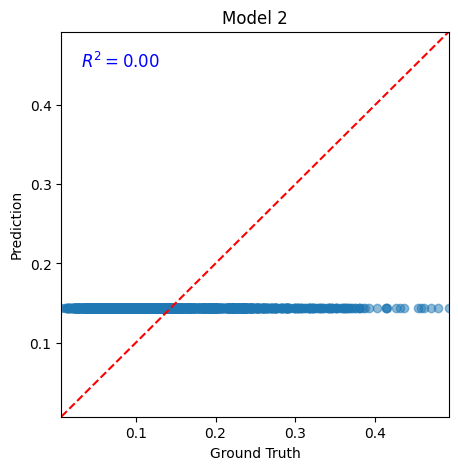

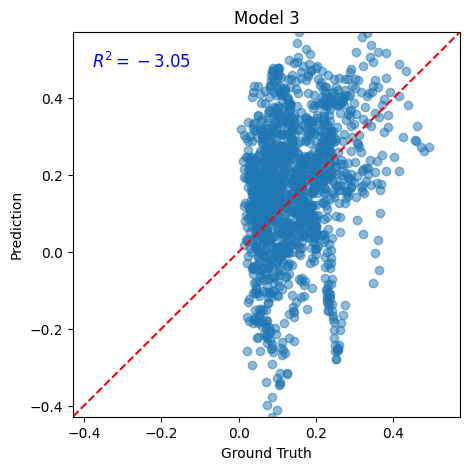

In [11]:
def plot_r2(gt, pred, title):
    plt.figure(figsize=[5,5])

    # YOUR CODE GOES HERE
    plt.scatter(gt, pred, alpha=0.5)
    r2_value = R2(gt, pred)
    plt.text(0.05, 0.95, f"$R^2 = {r2_value:.2f}$", ha="left", va="top", transform=plt.gca().transAxes, fontsize=12, color="blue")
    
    plt.plot([-1000,1000], [-1000,1000],"r--")

    all = np.concatenate([gt, pred])
    plt.xlim(np.min(all), np.max(all))
    plt.ylim(np.min(all), np.max(all))
    plt.xlabel("Ground Truth")
    plt.ylabel("Prediction")
    plt.title(title)
    plt.show()

plot_r2(gt, model1,"Model 1")
plot_r2(gt, model2,"Model 2")
plot_r2(gt, model3,"Model 3")

## Questions

1. Model 2 has an $R^2$ of exactly 0. Why?  


2. Model 3 has an $R^2$ less than 0. What does this mean?  


# Answers
1. An R2 value of 0 means that the model’s predictions are simply predicting the mean of the ground truth values for all data points. This suggests that Model 2 is not capturing any useful information or patterns in the data to explain or predict the variability in the ground truth.

2. An R2 value less than 0 indicates that the model's predictions are worse than just using the mean of the ground truth values as the prediction for all points. This typically happens when the model is poorly fit to the data and produces predictions that have a high error compared to the variance of the ground truth.